# TP 1 - Équation de la chaleur
## Schéma explicite

On résout numériquement l'équation de la chaleur sur $\Omega:=]-L,L[$ avec conditions aux limites de Dirichlet

$$ \frac{\partial u}{\partial t}(x,t)-\frac{\partial^2 u}{\partial x^2}(x,t) = 0,\quad x \in \Omega,\quad t \gt 0,\\
u(-L,t)=u(L,t)=0,\quad t > 0,\\
u(x,0)=u_0(x),\quad x \in \Omega, $$

et schéma explicite :

$$ \frac{u_j^{n+1}-u_j^n}{\Delta t}-\frac{u_{j+1}^n-2u_j^n+u_{j-1}^n}{\Delta x^2} = 0. $$ 

In [6]:
using LinearAlgebra, Plots
# Parameters
L = 10.0                               # domain half size
Nx = 10000                             # grid size (space)
Δx = 2*L/Nx                           # step size (space)                            # CFL
θ = 3/4
Δt = 0.01                         # step size (time)
Nt = 200                               # grid size (time)
x = range(-L, L, length=Nx+1)          # grid (space)
u0 = max.(0, 1 .- x.^2)                # initial condition
σ = Δt/(Δx^2)

# Explicit scheme
u = u0
u_plot = plot(x, u, xlabel="x", ylabel="u", color=:green, legend=false)

A = Tridiagonal(-σ*(1-θ)*ones(Nx),1+2*σ*(1-θ)*ones(Nx+1),-σ*(1-θ)*ones(Nx))
B = Tridiagonal(θ*σ*ones(Nx), 1 .- 2*σ*θ*ones(Nx+1), θ*σ*ones(Nx))

for n = 1:Nt
    u = A\(B*u)
    if mod(n, Nt/20) == 0
        plot!(u_plot, x, u, xlabel="x", ylabel="u", color=:black, legend=false)
    end
end
display(plot(u_plot, size=(700, 350)))

MethodError: MethodError: no method matching +(::Int64, ::Vector{Float64})
For element-wise addition, use broadcasting with dot syntax: scalar .+ array
Closest candidates are:
  +(::Any, ::Any, !Matched::Any, !Matched::Any...) at operators.jl:591
  +(::T, !Matched::T) where T<:Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8} at int.jl:87
  +(::Union{Int16, Int32, Int64, Int8}, !Matched::BigInt) at gmp.jl:537
  ...

In [8]:
# Comparison with exact solution (computed convoluting with Gaussian kernel)
us = zeros(Nx+1)
ker = exp.( -((0:Nx)*Δx).^2 / (4*Nt*Δt) )
kmax = findall(x -> x < 1e-14, ker)
kmax = length(kmax) > 0 ? kmax[1] : error("Increase Nx")

for j = 1:(Nx+1)
    jmin = max(1, j-kmax)
    jmax = min(Nx+1, j+kmax)
    us[j] = Δx * sum( u0[jmin:jmax].*ker[1 .+ abs.(j.-(jmin:jmax))] ) / sqrt(4*π*Nt*Δt)
end

err = us-u
us_plot = plot(x, us, xlabel="x", ylabel="us", color=:red, label="Solution", lw=6)
plot!(us_plot, x, u, xlabel="x", ylabel="u", color=:black, label="Finite differences", lw=2)
err_plot = plot(x, err, xlabel="x", ylabel="us-u", legend=false)
display(plot(us_plot, err_plot, layout=(2, 1), size=(700, 700)))
println("Δx: ", Δx, "\t Δt:", Δt, "\t max error: ", maximum(abs.(err)))

MethodError: MethodError: no method matching -(::Int64, ::CartesianIndex{2})
Closest candidates are:
  -(::Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8}) at int.jl:85
  -(::T, !Matched::T) where T<:Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8} at int.jl:86
  -(::Union{Int16, Int32, Int64, Int8}, !Matched::BigInt) at gmp.jl:539
  ...

In [7]:
# Precision test
Δx = [ 0.01,0.005,0.0025,0.000125 ]
errx = [ 0.001993374564768474,0.0014080889491761006, 0.0009936269970872713,0.00020905535329049374]
plot(Δx, errx, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δt", label="error")
plot!(Δx, Δx.^2, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δt", label="Δt^2")

ErrorException: Cannot convert Float64 to series data for plotting

θ = 1/2

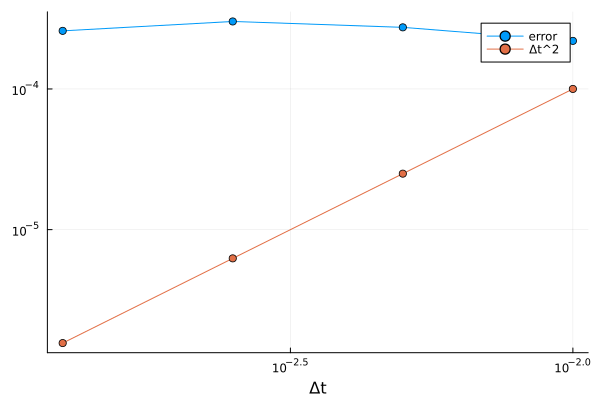

In [86]:
# Precision test
Δt = [ 0.01, 0.005, 0.0025, 0.00125]
errx = [ 0.00021959752453604153,0.00027402619738264855,0.000301738035103305,0.0002587565127283309]
plot(Δt, errx, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δt", label="error")
plot!(Δt, Δt.^2, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δt", label="Δt^2")

On remarque bien que pour θ = 1/2 la précison est en Δt^2 car les droites sont quasiment paralèle (graphe1) contrairement a 
θ différent de 1/2 (ex : θ = 3/4 graphe 2)
De plus pour θ < 1/2 il faut adapter Δx lorsque l'on change  Δt pour respecter la condition de stabilité ce qui rend l'affichage de 
précision en fonction de  Δt compliqué.